In [1]:
## Importing required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import jarque_bera
from scipy.stats import ttest_ind,mannwhitneyu,chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from warnings import filterwarnings
filterwarnings('ignore')

# Reading the data

In [2]:
df1 = pd.read_csv('backorder_prediction-training data.csv')
df2 = pd.read_csv('backorder_prediction-testingdata.csv')

In [3]:
df1.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [4]:
df2.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No


In [5]:
df1.shape,df2.shape

((1687861, 23), (242076, 23))

In [6]:
df1['perf_6_month_avg'] = df1['perf_6_month_avg'].replace(-99,np.nan)
df1['perf_12_month_avg'] = df1['perf_12_month_avg'].replace(-99,np.nan)

df2['perf_6_month_avg'] = df2['perf_6_month_avg'].replace(-99,np.nan)
df2['perf_12_month_avg'] = df2['perf_12_month_avg'].replace(-99,np.nan)

#### Dropping Null values

In [7]:
df1.dropna(inplace=True)

df2.dropna(inplace = True)

### Statistically comparing original test and train files

In [8]:
for i in df1.select_dtypes(include=np.number):
    t1,p1 = jarque_bera(df1[i])
    t2,p2 = jarque_bera(df2[i])
    if p1<0.05 or p2<0.05:
        t3,p3 = mannwhitneyu(df1[i],df2[i])
        if p3<0.05:
            print('Mean',i,'is not same for df1 and df2')
        else:
            print('Mean',i,'is same for df1 and df2')
    else:
        t4,p4 = ttest_ind(df1[i],df2[i])
        if p4<0.05:
            print('Mean',i,'is not same for df1 and df2')
        else:
            print('Mean',i,'is same for df1 and df2')
        

Mean national_inv is not same for df1 and df2
Mean lead_time is not same for df1 and df2
Mean in_transit_qty is not same for df1 and df2
Mean forecast_3_month is not same for df1 and df2
Mean forecast_6_month is same for df1 and df2
Mean forecast_9_month is same for df1 and df2
Mean sales_1_month is not same for df1 and df2
Mean sales_3_month is not same for df1 and df2
Mean sales_6_month is same for df1 and df2
Mean sales_9_month is same for df1 and df2
Mean min_bank is same for df1 and df2
Mean pieces_past_due is not same for df1 and df2
Mean perf_6_month_avg is not same for df1 and df2
Mean perf_12_month_avg is not same for df1 and df2
Mean local_bo_qty is not same for df1 and df2


#### Since few of the columns do not have statistically equal mean for df1 and df2, we cannot say that they represent eachother. Hence we join them to a single dataset.

### Concatinating both the dataframes into a single dataframe

In [7]:
df = pd.concat([df1,df2],axis=0).reset_index(drop=True)

In [10]:
df.head(5)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
1,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
2,1044198,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.82,0.87,0.0,No,No,No,Yes,No,No
3,1045098,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.0,Yes,No,Yes,Yes,No,No
4,1045867,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.82,0.87,0.0,No,No,No,Yes,No,No


#### Shape of the whole concatenated data

In [8]:
df.shape

(1929937, 23)

In [9]:
df['went_on_backorder'].value_counts()

No     1915954
Yes      13981
Name: went_on_backorder, dtype: int64

In [12]:
# df.to_csv('df_combined.csv', index=False,header=True)

#### Checking for the target varibale proportion¶

In [13]:
df['went_on_backorder'].value_counts(normalize=True)*100

No     99.246248
Yes     0.753752
Name: went_on_backorder, dtype: float64

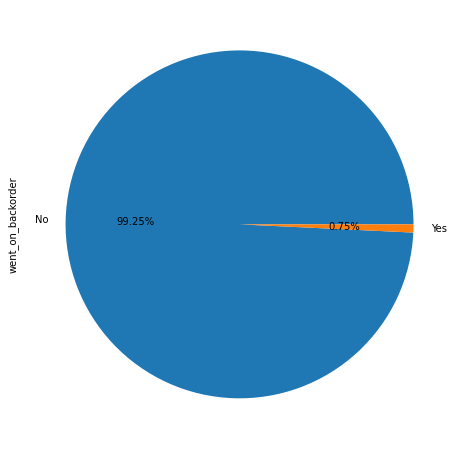

In [14]:
df['went_on_backorder'].value_counts(normalize=True).plot(kind='pie', autopct='%1.2f%%', figsize=(8,8))
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781356 entries, 0 to 1781355
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   sku                object 
 1   national_inv       float64
 2   lead_time          float64
 3   in_transit_qty     float64
 4   forecast_3_month   float64
 5   forecast_6_month   float64
 6   forecast_9_month   float64
 7   sales_1_month      float64
 8   sales_3_month      float64
 9   sales_6_month      float64
 10  sales_9_month      float64
 11  min_bank           float64
 12  potential_issue    object 
 13  pieces_past_due    float64
 14  perf_6_month_avg   float64
 15  perf_12_month_avg  float64
 16  local_bo_qty       float64
 17  deck_risk          object 
 18  oe_constraint      object 
 19  ppap_risk          object 
 20  stop_auto_buy      object 
 21  rev_stop           object 
 22  went_on_backorder  object 
dtypes: float64(15), object(8)
memory usage: 312.6+ MB


#### Checking Null values

In [16]:
df.isnull().sum()

sku                  0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

#### Checking any Duplicated entries

In [17]:
df[df.duplicated()]

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder


#### Dropping sku feature as it is an unique ID column and does not contribute to modeling

In [18]:
df.drop(columns='sku',inplace=True)

### Significance of categorical columns with target variable

In [19]:
import scipy.stats as stat
Stats=[]
P_value=[]
Dof=[]
Expected_value=[]
for i in df.select_dtypes('object').drop('went_on_backorder',axis=1).columns:
    observed_value=pd.crosstab(df[i],df.went_on_backorder)
    stats,p_value,dof,expected_value=stat.chi2_contingency(observed_value)
    Stats.append(stats)
    P_value.append(p_value)
    Dof.append(dof)
    Expected_value.append(expected_value)

    
p_value=pd.DataFrame({'Features':df.select_dtypes('object').drop('went_on_backorder',axis=1).columns,"P_value":P_value})
p_value   

,Features,P_value
0,potential_issue,9.972621e-67
1,deck_risk,1.319419e-26
2,oe_constraint,2.023007e-05
3,ppap_risk,1.995720e-36
4,stop_auto_buy,4.091337e-05
5,rev_stop,8.574221e-01


##### The pvalue >0.05 hence rev_stop is insignificant variable

### Significance of numerical columns with target variable

In [20]:
from sklearn.feature_selection import SelectKBest,f_classif

In [21]:
x=df.select_dtypes(include='number')
y=df['went_on_backorder'].replace({'Yes':1,"No":0})

select=SelectKBest(f_classif,k=len(x.columns))
select.fit(x,y)

imp_feature=pd.DataFrame({'Feature':x.columns,'P_value':select.pvalues_})

imp_feature

,Feature,P_value
0,national_inv,2.175785e-04
1,lead_time,3.378210e-132
2,in_transit_qty,2.351184e-04
3,forecast_3_month,7.607709e-01
4,forecast_6_month,3.142385e-01
5,forecast_9_month,1.890467e-01
6,sales_1_month,7.513695e-02
7,sales_3_month,2.454968e-02
8,sales_6_month,1.211396e-02
9,sales_9_month,1.050735e-02


In [22]:
imp_feature[imp_feature['P_value']>0.05]  #insignificant features

,Feature,P_value
3,forecast_3_month,0.760771
4,forecast_6_month,0.314239
5,forecast_9_month,0.189047
6,sales_1_month,0.075137
11,pieces_past_due,0.426625


In [23]:
imp_feature[imp_feature['P_value']<0.05]  #significant features

,Feature,P_value
0,national_inv,2.175785e-04
1,lead_time,3.378210e-132
2,in_transit_qty,2.351184e-04
7,sales_3_month,2.454968e-02
8,sales_6_month,1.211396e-02
9,sales_9_month,1.050735e-02
10,min_bank,5.615659e-03
12,perf_6_month_avg,4.340309e-305
13,perf_12_month_avg,5.021616e-303
14,local_bo_qty,2.483807e-35


##### Though out of the 21 columns we get 15 variables as significant. We are not going to drop them immediately 

## Considering a sample of 5% from the original data

In [24]:
sample = df.sample(frac=0.05,random_state=1)

In [25]:
sample.shape

(89068, 22)

In [26]:
# sample.to_csv('sample_combined.csv', index=False,header=True)

In [27]:
sample['went_on_backorder'].value_counts()

No     88356
Yes      712
Name: went_on_backorder, dtype: int64

In [28]:
sample['went_on_backorder'].value_counts(normalize=True)*100

No     99.200611
Yes     0.799389
Name: went_on_backorder, dtype: float64

Target variable distribution is almost same as of that of original dataset target variable

## Statistical test to check if the sample represents the Original data

Hypothesis for Jarque Bera

    H0: The data is normally distributed
    HA: The data is not normally distributed.
    
  If data is not normally distributed then mannwhitneyu:

    H0: The sample mean is same as df mean.
    HA: The sample mean is not same as df mean.
    
  If data is normally distributed then ttest_ind:

    H0: The sample mean is same as df mean.
    HA: The sample mean is not same as df mean.

In [29]:
for i in df.select_dtypes(include=np.number):
    t1,p1 = jarque_bera(sample[i])
    t2,p2 = jarque_bera(df[i])
    if p1<0.05 or p2<0.05:
        t3,p3 = mannwhitneyu(sample[i],df[i])
        if p3<0.05:
            print('Mean',i,'is not same for sample and df')
        else:
            print('Mean',i,'is same for sample and df')
    else:
        t4,p4 = ttest_ind(sample[i],df[i])
        if p4<0.05:
            print('Mean',i,'is not same for sample and df')
        else:
            print('Mean',i,'is same for sample and df')

Mean national_inv is same for sample and df
Mean lead_time is same for sample and df
Mean in_transit_qty is same for sample and df
Mean forecast_3_month is same for sample and df
Mean forecast_6_month is same for sample and df
Mean forecast_9_month is same for sample and df
Mean sales_1_month is same for sample and df
Mean sales_3_month is same for sample and df
Mean sales_6_month is same for sample and df
Mean sales_9_month is same for sample and df
Mean min_bank is same for sample and df
Mean pieces_past_due is same for sample and df
Mean perf_6_month_avg is same for sample and df
Mean perf_12_month_avg is same for sample and df
Mean local_bo_qty is same for sample and df


In [30]:
print('H0: The proportion is same')
print('HA: The proportion is not same\n')
for i in df.select_dtypes(include='object'):
    sa = dict(sample[i].value_counts())
    po = dict(df[i].value_counts())
    x = [sa['Yes'],po['Yes']]
    n = [sa['Yes']+sa['No'],po['Yes']+po['No']]
    t,p = proportions_ztest(x,n)
    if p<0.05:
        print('Reject H0, proportion of',i,'in sample is not statistically same as proportion of',i,'in population\n')
    else:
        print('Accept H0, proportion of',i,'in sample is statistically same as proportion of',i,'in population\n')
    

H0: The proportion is same
HA: The proportion is not same

Accept H0, proportion of potential_issue in sample is statistically same as proportion of potential_issue in population

Accept H0, proportion of deck_risk in sample is statistically same as proportion of deck_risk in population

Accept H0, proportion of oe_constraint in sample is statistically same as proportion of oe_constraint in population

Accept H0, proportion of ppap_risk in sample is statistically same as proportion of ppap_risk in population

Accept H0, proportion of stop_auto_buy in sample is statistically same as proportion of stop_auto_buy in population

Accept H0, proportion of rev_stop in sample is statistically same as proportion of rev_stop in population

Accept H0, proportion of went_on_backorder in sample is statistically same as proportion of went_on_backorder in population



##### From above we have proved that the sample is a perfect representation of the population

### splitting Train and Test data

In [31]:
sample['went_on_backorder'] = sample['went_on_backorder'].replace({'Yes':1,'No':0})

# Splitting the data into x and y
y=sample['went_on_backorder']
x=sample.drop('went_on_backorder',axis=1)

# Creating dummies on the independent categorical columns
x1=pd.get_dummies(x,drop_first=True)
x1.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes
1094229,21.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.84,0.82,0.0,0,1,0,0,1,0
386073,3.0,2.0,1.0,0.0,0.0,0.0,3.0,5.0,5.0,5.0,...,0.0,0.99,0.99,0.0,0,1,0,0,1,0
1546535,5.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.87,0.88,0.0,0,0,0,1,1,0
19757,10.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.91,0.74,0.0,0,0,0,0,1,0
1564658,114.0,2.0,92.0,136.0,296.0,439.0,40.0,153.0,304.0,444.0,...,3.0,0.37,0.33,0.0,0,0,0,0,1,0


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
xtrain,xtest,ytrain,ytest = train_test_split(x1,y,test_size=0.2,random_state=4)

In [34]:
# printing the shape of the splitted data
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((71254, 21), (17814, 21), (71254,), (17814,))

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,confusion_matrix,f1_score,classification_report, recall_score,precision_score, cohen_kappa_score

In [36]:
# Model evaluation function

def model_eval(xtrain, xtest, ytrain, ytest, ypred_train, ypred_test, ytrain_prob, ytest_prob):
    
    ac_tr = accuracy_score(ytrain,ypred_train)
    ac_ts = accuracy_score(ytest,ypred_test)
    print("accuracy score of the train data is: ",ac_tr)
    print("accuracy score of the test data is: ",ac_ts)

    f1_tr = f1_score(ytrain,ypred_train)
    f1_ts = f1_score(ytest,ypred_test)
    print("\nF1 score of the train data is: ",f1_tr)
    print("F1 score of the test data is: ",f1_ts)

    roc_tr = roc_auc_score(ytrain,ytrain_prob)
    roc_ts = roc_auc_score(ytest,ytest_prob)
    print("\nroc_auc_score of the train data is: ",roc_tr)
    print("roc_auc_score of the test data is: ",roc_ts)
    
    recall_tr = recall_score(ytest,ypred_test)
    precison_tr = precision_score(ytest,ypred_test)
    print("\nrecall_score of the test data is: ",recall_tr)
    print("precision_score of the test data is: ",precison_tr)
    
    kappa_tr = cohen_kappa_score(ytrain,ypred_train)
    kappa_ts = cohen_kappa_score(ytest,ypred_test)
    print("\ncohen_kappa_score  of the train data is: ",kappa_tr)
    print("cohen_kappa_score  of the test data is: ",kappa_ts)
    
    

    print('\nClassification report train')
    print(classification_report(ytrain,ypred_train))

    print('\n\nClassification report test')
    print(classification_report(ytest,ypred_test))

    print('\nConfusion matrix train data')
    plt.figure(figsize=(5,3))
    cm2=confusion_matrix(ytrain,ypred_train)
    conf_matrix = pd.DataFrame(data = cm2,columns = ['Predicted:0','Predicted:1'], 
                               index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
    
    print('\nConfusion matrix test data')
    plt.figure(figsize=(5,3))
    cm2=confusion_matrix(ytest, ypred_test)
    conf_matrix = pd.DataFrame(data = cm2,columns = ['Predicted:0','Predicted:1'], 
                               index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    
    fpr,tpr,thresholds = roc_curve(ytest,ytest_prob)
    fpr1,tpr1,th1      = roc_curve(ytrain,ytrain_prob)
    
    plt.figure(figsize=(10,7))
    plt.plot(fpr,fpr)
    plt.plot(fpr1,tpr1,label='Train roc_curve')
    plt.plot(fpr,tpr,label='Test roc_curve')
    plt.xlabel('FPR',fontsize=14)
    plt.ylabel('TPR',fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    plt.show()
    
    return f1_tr,f1_ts,roc_tr,roc_ts,recall_tr,precison_tr,kappa_tr,kappa_ts

In [37]:
models           = []
f1_train_scores  = []
f1_test_scores   = []
roc_train_scores = []
roc_test_scores  = []
recall_test      = []
precision_test   = []
kapppa_train_score = []
kapppa_test_score = []

### Base model - Logistic regression

In [38]:

lr = LogisticRegression()
lr.fit(xtrain,ytrain)

ytrain_pred_base = lr.predict(xtrain)
ytrain_prob_base = lr.predict_proba(xtrain)[:,1]

ytest_pred_base = lr.predict(xtest)
ytest_prob_base = lr.predict_proba(xtest)[:,1]

accuracy score of the train data is:  0.9917899346001628
accuracy score of the test data is:  0.9919726058156506

F1 score of the train data is:  0.01015228426395939
F1 score of the test data is:  0.0

roc_auc_score of the train data is:  0.7263440983457857
roc_auc_score of the test data is:  0.6644336380124037

recall_score of the test data is:  0.0
precision_score of the test data is:  0.0

cohen_kappa_score  of the train data is:  0.009693335947948412
cohen_kappa_score  of the test data is:  -0.0005420220249470198

Classification report train
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     70680
           1       0.18      0.01      0.01       574

    accuracy                           0.99     71254
   macro avg       0.58      0.50      0.50     71254
weighted avg       0.99      0.99      0.99     71254



Classification report test
              precision    recall  f1-score   support

           0       0.99      1.00    

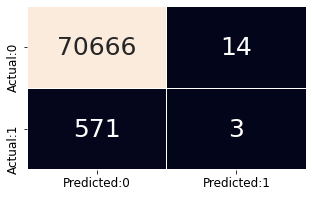


Confusion matrix test data


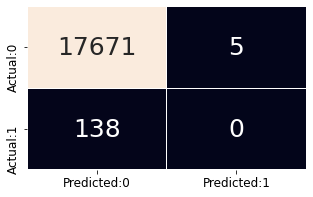

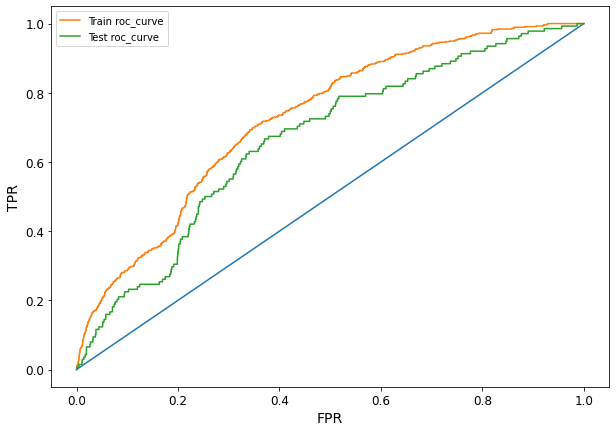

In [39]:
log_train_f1_base, log_test_f1_base, log_train_roc_base, log_test_roc_base , recall_tr,precison_tr,cohen_kappa_score_tr,cohen_kappa_score_ts = model_eval(xtrain, xtest, 
                                                                                                                                                ytrain, ytest, 
                                                                                                                                                ytrain_pred_base, ytest_pred_base,
                                                                                                                                                ytrain_prob_base, ytest_prob_base)


*The accuracy score of the base model is very high. But we can see the f1_score and cohen_kappa_score is very bad. We can clearly see the reason for this ftom the confusion matrix and the classification report.*

*The sheer imabalance of the data, the model has completely classified all the went to back order - yes class as no. And since the number of yes class is so few the accuracy score is not affect by that. But f1 score being the harmonic mean of the precision and recall, it clearly shows that model is just acting like a null model and giving the output as class the higher propbablity. Hence we conclude that we have to perfrom data balancing techniques.*

In [40]:
models.append('Base model - Logistic regression')          
f1_train_scores.append(log_train_f1_base)
f1_test_scores.append(log_test_f1_base)
roc_train_scores.append(log_train_roc_base)
roc_test_scores.append(log_test_roc_base)
recall_test.append(recall_tr)
precision_test.append(precison_tr)
kapppa_train_score.append(cohen_kappa_score_tr)
kapppa_test_score.append(cohen_kappa_score_ts)

In [41]:
summary= pd.DataFrame({'Models':models,
                       'Train f1 score':f1_train_scores,
                       'Test f1 scores':f1_test_scores,
                       'Train ROC':roc_train_scores,
                       'Test ROC':roc_test_scores,
                       'Test recall':recall_test,
                       'Test precision':precision_test,
                      'kapppa_train_score':kapppa_train_score,
                       'kapppa_test_score':kapppa_test_score})
summary

,Models,Train f1 score,Test f1 scores,Train ROC,Test ROC,Test recall,Test precision,kapppa_train_score,kapppa_test_score
0,Base model - Logistic regression,0.010152,0.0,0.726344,0.664434,0.0,0.0,0.009693,-0.000542


### Base Model RandomForest Classifier

In [42]:
plt.style.use('seaborn-bright')

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf_base = RandomForestClassifier(random_state=3)
rf_base.fit(xtrain,ytrain)

ytrain_pred_base_rf = rf_base.predict(xtrain)
ytrain_prob_base_rf = rf_base.predict_proba(xtrain)[:,1]

ytest_pred_base_rf = rf_base.predict(xtest)
ytest_prob_base_rf = rf_base.predict_proba(xtest)[:,1]

accuracy score of the train data is:  0.9997894855025683
accuracy score of the test data is:  0.9919164701919838

F1 score of the train data is:  0.986784140969163
F1 score of the test data is:  0.04

roc_auc_score of the train data is:  0.9999881810150869
roc_auc_score of the test data is:  0.888478523241208

recall_score of the test data is:  0.021739130434782608
precision_score of the test data is:  0.25

cohen_kappa_score  of the train data is:  0.9866780527035136
cohen_kappa_score  of the test data is:  0.038808627736635404

Classification report train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70680
           1       1.00      0.98      0.99       574

    accuracy                           1.00     71254
   macro avg       1.00      0.99      0.99     71254
weighted avg       1.00      1.00      1.00     71254



Classification report test
              precision    recall  f1-score   support

           0       0.99  

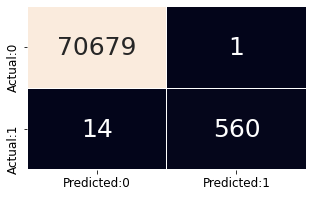


Confusion matrix test data


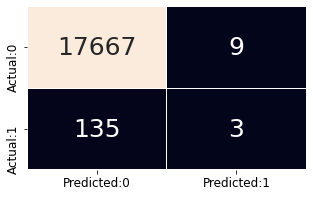

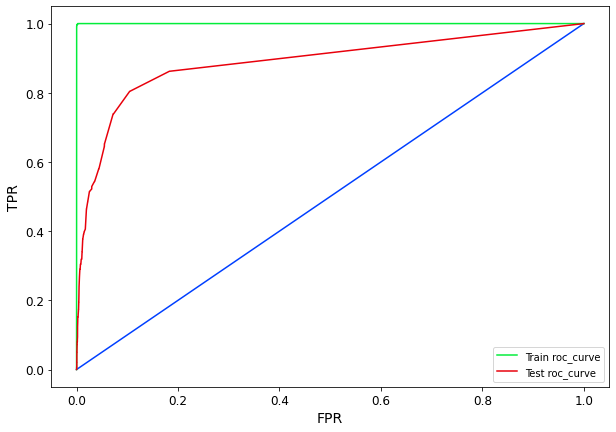

In [44]:
rf_base_train_f1, rf_base_test_f1, rf_base_train_roc, rf_base_test_roc , recall_tr,precison_tr,cohen_kappa_score_tr,cohen_kappa_score_ts= model_eval(xtrain, xtest, 
                                                                                                                                        ytrain, ytest, 
                                                                                                                                        ytrain_pred_base_rf, ytest_pred_base_rf, 
                                                                                                                                        ytrain_prob_base_rf, ytest_prob_base_rf)

*From the results we can see that random forest has overfit the train data. The test data performace is poor. Like the logisitic regression the imbalance has affected the model really bad, though it performed slightly better than the Logistic regression model.*

In [45]:
models.append('Base model - RandomForest')
f1_train_scores.append(rf_base_train_f1)
f1_test_scores.append(rf_base_test_f1)
roc_train_scores.append(rf_base_train_roc)
roc_test_scores.append(rf_base_test_roc)
recall_test.append(recall_tr)
precision_test.append(precison_tr)
kapppa_train_score.append(cohen_kappa_score_tr)
kapppa_test_score.append(cohen_kappa_score_ts) 

In [46]:
summary= pd.DataFrame({'Models':models,
                       'Train f1 score':f1_train_scores,
                       'Test f1 scores':f1_test_scores,
                       'Train ROC':roc_train_scores,
                       'Test ROC':roc_test_scores,
                       'Test recall':recall_test,
                       'Test precision':precision_test,
                      'kapppa_train_score':kapppa_train_score,
                       'kapppa_test_score':kapppa_test_score})
summary

,Models,Train f1 score,Test f1 scores,Train ROC,Test ROC,Test recall,Test precision,kapppa_train_score,kapppa_test_score
0,Base model - Logistic regression,0.010152,0.00,0.726344,0.664434,0.000000,0.00,0.009693,-0.000542
1,Base model - RandomForest,0.986784,0.04,0.999988,0.888479,0.021739,0.25,0.986678,0.038809


## Treating Data Imbalance - SMOTE

In [47]:
from imblearn.over_sampling import SMOTE


In [48]:
smote = SMOTE(sampling_strategy='minority',random_state=3)

xtrain_smote,ytrain_smote = smote.fit_resample(xtrain,ytrain)

In [49]:
# xtrain_smote.to_csv('xtrain_smote.csv', index=False,header=True)
# ytrain_smote.to_csv('ytrain_smote.csv', index=False,header=True)

#### Orginal data shape:

In [50]:
xtrain.shape,ytrain.shape

((71254, 21), (71254,))

In [51]:
ytrain.value_counts()

0    70680
1      574
Name: went_on_backorder, dtype: int64

#### Over sampled data shape:

In [52]:
xtrain_smote.shape,ytrain_smote.shape

((141360, 21), (141360,))

In [53]:
ytrain_smote.value_counts()

0    70680
1    70680
Name: went_on_backorder, dtype: int64

## Modelling with SMOTE data

### Logistic Regression - (SMOTE)

In [54]:
lr = LogisticRegression(solver='liblinear',max_iter=5000)
lr.fit(xtrain_smote,ytrain_smote)

ytrain_pred_smote = lr.predict(xtrain_smote)
ytrain_prob_smote = lr.predict_proba(xtrain_smote)[:,1]

ytest_pred_smote = lr.predict(xtest)
ytest_prob_smote = lr.predict_proba(xtest)[:,1]

accuracy score of the train data is:  0.7908177702320317
accuracy score of the test data is:  0.6791849107443584

F1 score of the train data is:  0.8119052465523384
F1 score of the test data is:  0.031191727411425663

roc_auc_score of the train data is:  0.8733296842676959
roc_auc_score of the test data is:  0.7738354388657673

recall_score of the test data is:  0.6666666666666666
precision_score of the test data is:  0.015969449748307586

cohen_kappa_score  of the train data is:  0.5816355404640634
cohen_kappa_score  of the test data is:  0.016307493858384037

Classification report train
              precision    recall  f1-score   support

           0       0.87      0.68      0.76     70680
           1       0.74      0.90      0.81     70680

    accuracy                           0.79    141360
   macro avg       0.81      0.79      0.79    141360
weighted avg       0.81      0.79      0.79    141360



Classification report test
              precision    recall  f1-score   su

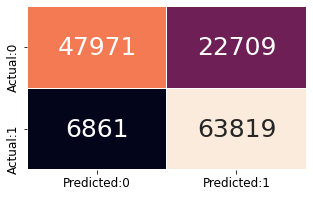


Confusion matrix test data


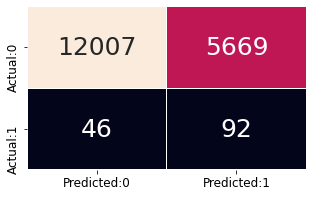

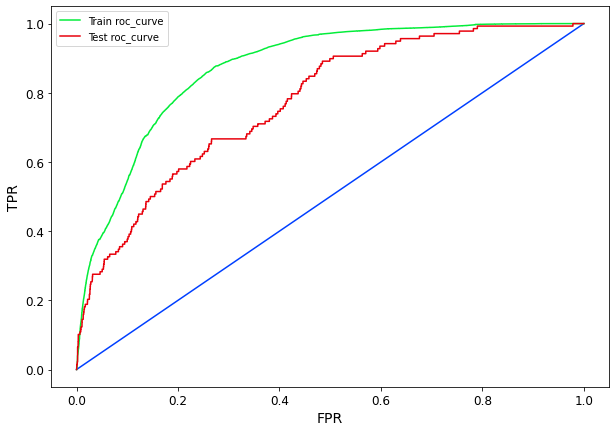

In [55]:
log_train_f1_smote, log_test_f1_smote, log_train_roc_smote, log_test_roc_smote , recall_tr,precison_tr,cohen_kappa_score_tr,cohen_kappa_score_ts= model_eval(xtrain_smote, xtest, 
                                                                                            ytrain_smote,ytest,
                                                                                            ytrain_pred_smote, ytest_pred_smote,
                                                                                            ytrain_prob_smote, ytest_prob_smote)

##### The overall accuracy has dropped now, but f1 score for both train and test has improved and the roc score too has seen a hike in its value. In effect the model performance has improved a lot for the Logistic regression model.

In [56]:
models.append('SMOTE Data - Logistic Regression')
f1_train_scores.append(log_train_f1_smote)
f1_test_scores.append(log_test_f1_smote)
roc_train_scores.append(log_train_roc_smote)
roc_test_scores.append(log_test_roc_smote)
recall_test.append(recall_tr)
precision_test.append(precison_tr)
kapppa_train_score.append(cohen_kappa_score_tr)
kapppa_test_score.append(cohen_kappa_score_ts) 

In [57]:
summary= pd.DataFrame({'Models':models,
                       'Train f1 score':f1_train_scores,
                       'Test f1 scores':f1_test_scores,
                       'Train ROC':roc_train_scores,
                       'Test ROC':roc_test_scores,
                       'Test recall':recall_test,
                       'Test precision':precision_test,
                      'kapppa_train_score':kapppa_train_score,
                       'kapppa_test_score':kapppa_test_score})
summary

,Models,Train f1 score,Test f1 scores,Train ROC,Test ROC,Test recall,Test precision,kapppa_train_score,kapppa_test_score
0,Base model - Logistic regression,0.010152,0.000000,0.726344,0.664434,0.000000,0.000000,0.009693,-0.000542
1,Base model - RandomForest,0.986784,0.040000,0.999988,0.888479,0.021739,0.250000,0.986678,0.038809
2,SMOTE Data - Logistic Regression,0.811905,0.031192,0.873330,0.773835,0.666667,0.015969,0.581636,0.016307


###  RandomForest  - (SMOTE)

In [58]:
rf_SMOTE= RandomForestClassifier(random_state=3)
rf_SMOTE.fit(xtrain,ytrain)

ytrain_pred_rf_SMOTE = rf_SMOTE.predict(xtrain_smote)
ytrain_prob_rf_SMOTE = rf_SMOTE.predict_proba(xtrain_smote)[:,1]

ytest_pred_rf_SMOTE = rf_SMOTE.predict(xtest)
ytest_prob_rf_SMOTE = rf_SMOTE.predict_proba(xtest)[:,1]

accuracy score of the train data is:  0.6220925297113752
accuracy score of the test data is:  0.9919164701919838

F1 score of the train data is:  0.3925359047543239
F1 score of the test data is:  0.04

roc_auc_score of the train data is:  0.9833478220025436
roc_auc_score of the test data is:  0.888478523241208

recall_score of the test data is:  0.021739130434782608
precision_score of the test data is:  0.25

cohen_kappa_score  of the train data is:  0.24418505942275037
cohen_kappa_score  of the test data is:  0.038808627736635404

Classification report train
              precision    recall  f1-score   support

           0       0.57      1.00      0.73     70680
           1       1.00      0.24      0.39     70680

    accuracy                           0.62    141360
   macro avg       0.78      0.62      0.56    141360
weighted avg       0.78      0.62      0.56    141360



Classification report test
              precision    recall  f1-score   support

           0       0.99

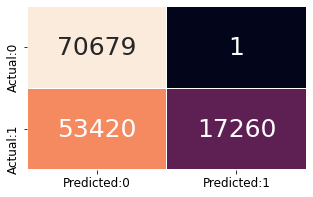


Confusion matrix test data


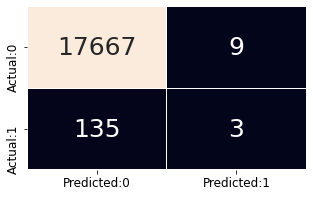

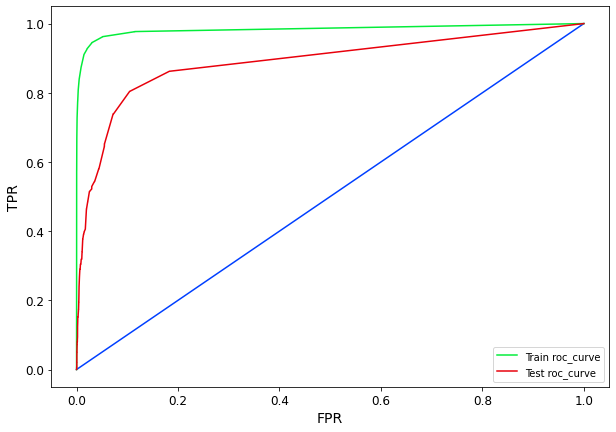

In [59]:
rf_train_f1_SMOTE, rf_test_f1_SMOTE, rf_train_roc_SMOTE, rf_test_roc_SMOTE , recall_tr,precison_tr,cohen_kappa_score_tr,cohen_kappa_score_ts = model_eval(xtrain_smote, xtest, 
                                                                                                                                            ytrain_smote, ytest, 
                                                                                                                                            ytrain_pred_rf_SMOTE, ytest_pred_rf_SMOTE, 
                                                                                                                                            ytrain_prob_rf_SMOTE, ytest_prob_rf_SMOTE)

##### The performance of the train data fell for RandomForest model with SOMTE data, but the test data performance remain almost unaffected.

In [60]:
models.append('SMOTE Data - RandomForest')
f1_train_scores.append(rf_train_f1_SMOTE)
f1_test_scores.append(rf_test_f1_SMOTE)
roc_train_scores.append(rf_train_roc_SMOTE)
roc_test_scores.append(rf_test_roc_SMOTE)
recall_test.append(recall_tr)
precision_test.append(precison_tr)
kapppa_train_score.append(cohen_kappa_score_tr)
kapppa_test_score.append(cohen_kappa_score_ts) 

In [61]:
summary= pd.DataFrame({'Models':models,
                       'Train f1 score':f1_train_scores,
                       'Test f1 scores':f1_test_scores,
                       'Train ROC':roc_train_scores,
                       'Test ROC':roc_test_scores,
                       'Test recall':recall_test,
                       'Test precision':precision_test,
                      'kapppa_train_score':kapppa_train_score,
                       'kapppa_test_score':kapppa_test_score})
summary

,Models,Train f1 score,Test f1 scores,Train ROC,Test ROC,Test recall,Test precision,kapppa_train_score,kapppa_test_score
0,Base model - Logistic regression,0.010152,0.000000,0.726344,0.664434,0.000000,0.000000,0.009693,-0.000542
1,Base model - RandomForest,0.986784,0.040000,0.999988,0.888479,0.021739,0.250000,0.986678,0.038809
2,SMOTE Data - Logistic Regression,0.811905,0.031192,0.873330,0.773835,0.666667,0.015969,0.581636,0.016307
3,SMOTE Data - RandomForest,0.392536,0.040000,0.983348,0.888479,0.021739,0.250000,0.244185,0.038809


## Outlier Treatment 

In [62]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [63]:
xtrain_num = xtrain_smote.iloc[:,0:15]
xtest_num = xtest.iloc[:,0:15]

xtrain_cat = xtrain_smote.iloc[:,15:]
xtest_cat = xtest.iloc[:,15:]

In [64]:
xtrain_pt = pt.fit_transform(xtrain_num)
xtrain_pt = pd.DataFrame(xtrain_pt,columns=xtrain_num.columns,index=xtrain_num.index)

xtest_pt = pt.transform(xtest_num)
xtest_pt = pd.DataFrame(xtest_pt,columns=xtest_num.columns,index=xtest_num.index)

In [65]:
xtrain_pt = pd.concat([xtrain_pt,xtrain_cat],axis=1)
xtest_pt  = pd.concat([xtest_pt,xtest_cat],axis=1)

In [66]:
skew = xtrain_pt.skew().reset_index()
skew.columns=['Features','skewness']
skew

,Features,skewness
0,national_inv,4.920324
1,lead_time,0.016160
2,in_transit_qty,1.684185
3,forecast_3_month,0.249037
4,forecast_6_month,0.177607
5,forecast_9_month,0.147291
6,sales_1_month,0.328823
7,sales_3_month,0.170744
8,sales_6_month,0.118766
9,sales_9_month,0.095086


## Modelling with Transformed Data

### Logistic Regression - Power Transformed Data

In [67]:
lr_pt = LogisticRegression(solver='liblinear',max_iter=5000)
lr_pt.fit(xtrain_pt,ytrain_smote)

ytrain_pred_pt = lr_pt.predict(xtrain_pt)
ytrain_prob_pt = lr_pt.predict_proba(xtrain_pt)[:,1]

ytest_pred_pt = lr_pt.predict(xtest_pt)
ytest_prob_pt = lr_pt.predict_proba(xtest_pt)[:,1]

accuracy score of the train data is:  0.843251273344652
accuracy score of the test data is:  0.8494442573256988

F1 score of the train data is:  0.8423725919813335
F1 score of the test data is:  0.06939625260235947

roc_auc_score of the train data is:  0.9131537688575593
roc_auc_score of the test data is:  0.842870132596069

recall_score of the test data is:  0.7246376811594203
precision_score of the test data is:  0.03644314868804665

cohen_kappa_score  of the train data is:  0.6865025466893039
cohen_kappa_score  of the test data is:  0.05546286229154973

Classification report train
              precision    recall  f1-score   support

           0       0.84      0.85      0.84     70680
           1       0.85      0.84      0.84     70680

    accuracy                           0.84    141360
   macro avg       0.84      0.84      0.84    141360
weighted avg       0.84      0.84      0.84    141360



Classification report test
              precision    recall  f1-score   support

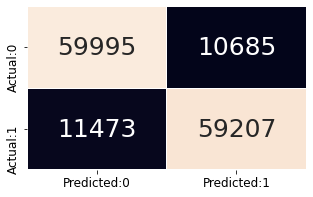


Confusion matrix test data


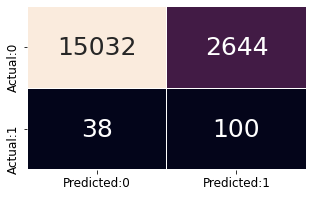

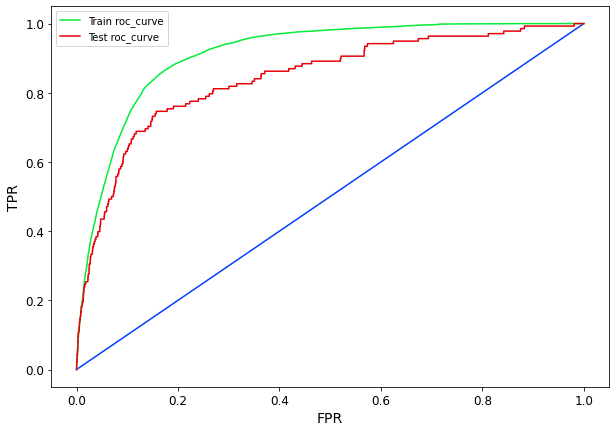

In [68]:
log_train_f1_pt,log_test_f1_pt,log_train_roc_pt,log_test_roc_pt , recall_tr,precison_tr,cohen_kappa_score_tr,cohen_kappa_score_ts  = model_eval(xtrain_pt, xtest_pt,
                                                                              ytrain_smote,ytest,
                                                                              ytrain_pred_pt, ytest_pred_pt,
                                                                              ytrain_prob_pt, ytest_prob_pt)

In [69]:
models.append('PowerTransformed Data - Logistic Regression')
f1_train_scores.append(log_train_f1_pt)
f1_test_scores.append(log_test_f1_pt)
roc_train_scores.append(log_train_roc_pt)
roc_test_scores.append(log_test_roc_pt)
recall_test.append(recall_tr)
precision_test.append(precison_tr)
kapppa_train_score.append(cohen_kappa_score_tr)
kapppa_test_score.append(cohen_kappa_score_ts)

In [70]:

summary= pd.DataFrame({'Models':models,
                       'Train f1 score':f1_train_scores,
                       'Test f1 scores':f1_test_scores,
                       'Train ROC':roc_train_scores,
                       'Test ROC':roc_test_scores,
                       'Test recall':recall_test,
                       'Test precision':precision_test,
                      'kapppa_train_score':kapppa_train_score,
                       'kapppa_test_score':kapppa_test_score})
summary

,Models,Train f1 score,Test f1 scores,Train ROC,Test ROC,Test recall,Test precision,kapppa_train_score,kapppa_test_score
0,Base model - Logistic regression,0.010152,0.000000,0.726344,0.664434,0.000000,0.000000,0.009693,-0.000542
1,Base model - RandomForest,0.986784,0.040000,0.999988,0.888479,0.021739,0.250000,0.986678,0.038809
2,SMOTE Data - Logistic Regression,0.811905,0.031192,0.873330,0.773835,0.666667,0.015969,0.581636,0.016307
3,SMOTE Data - RandomForest,0.392536,0.040000,0.983348,0.888479,0.021739,0.250000,0.244185,0.038809
4,PowerTransformed Data - Logistic Regression,0.842373,0.069396,0.913154,0.842870,0.724638,0.036443,0.686503,0.055463


### RandomForest - PowerTransformed Data 

In [71]:
rf_pt= RandomForestClassifier(random_state=3)
rf_pt.fit(xtrain_pt,ytrain_smote)

ytrain_pred_rf_pt = rf_pt.predict(xtrain_pt)
ytrain_prob_rf_pt = rf_pt.predict_proba(xtrain_pt)[:,1]

ytest_pred_rf_pt = rf_pt.predict(xtest_pt)
ytest_prob_rf_pt = rf_pt.predict_proba(xtest_pt)[:,1]

accuracy score of the train data is:  0.9999009620826259
accuracy score of the test data is:  0.9883799259009768

F1 score of the train data is:  0.9999009550760524
F1 score of the test data is:  0.18823529411764706

roc_auc_score of the train data is:  0.9999988913382136
roc_auc_score of the test data is:  0.8967516340833883

recall_score of the test data is:  0.17391304347826086
precision_score of the test data is:  0.20512820512820512

cohen_kappa_score  of the train data is:  0.9998019241652518
cohen_kappa_score  of the test data is:  0.1824233450798376

Classification report train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70680
           1       1.00      1.00      1.00     70680

    accuracy                           1.00    141360
   macro avg       1.00      1.00      1.00    141360
weighted avg       1.00      1.00      1.00    141360



Classification report test
              precision    recall  f1-score   suppo

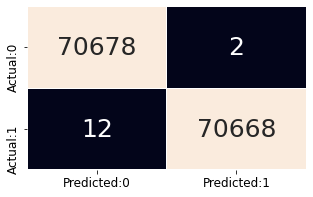


Confusion matrix test data


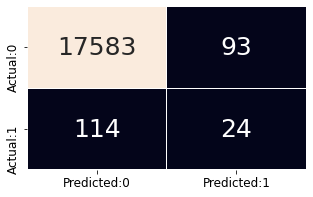

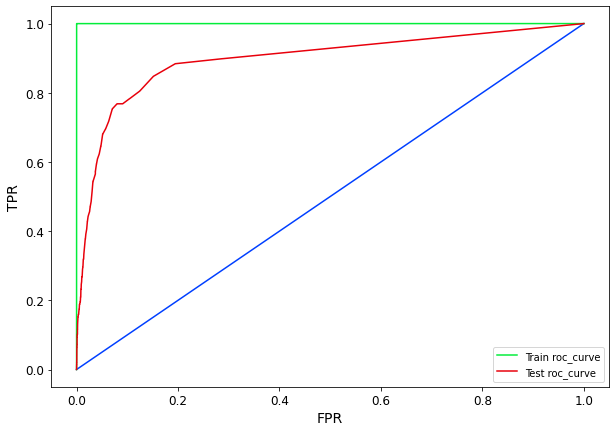

In [72]:
rf_train_f1_pt, rf_test_f1_pt, rf_train_roc_pt, rf_test_roc_pt  , recall_tr,precison_tr,cohen_kappa_score_tr,cohen_kappa_score_ts= model_eval(xtrain_pt, xtest_pt, 
                                                                                        ytrain_smote, ytest, 
                                                                                        ytrain_pred_rf_pt, ytest_pred_rf_pt, 
                                                                                        ytrain_prob_rf_pt, ytest_prob_rf_pt)

In [73]:
models.append('PowerTransformed Data - RandomForest')
f1_train_scores.append(rf_train_f1_pt)
f1_test_scores.append(rf_test_f1_pt)
roc_train_scores.append(rf_train_roc_pt)
roc_test_scores.append(rf_test_roc_pt)
recall_test.append(recall_tr)
precision_test.append(precison_tr)
kapppa_train_score.append(cohen_kappa_score_tr)
kapppa_test_score.append(cohen_kappa_score_ts)

In [74]:
summary= pd.DataFrame({'Models':models,
                       'Train f1 score':f1_train_scores,
                       'Test f1 scores':f1_test_scores,
                       'Train ROC':roc_train_scores,
                       'Test ROC':roc_test_scores,
                       'Test recall':recall_test,
                       'Test precision':precision_test,
                      'kapppa_train_score':kapppa_train_score,
                       'kapppa_test_score':kapppa_test_score})
summary

,Models,Train f1 score,Test f1 scores,Train ROC,Test ROC,Test recall,Test precision,kapppa_train_score,kapppa_test_score
0,Base model - Logistic regression,0.010152,0.000000,0.726344,0.664434,0.000000,0.000000,0.009693,-0.000542
1,Base model - RandomForest,0.986784,0.040000,0.999988,0.888479,0.021739,0.250000,0.986678,0.038809
2,SMOTE Data - Logistic Regression,0.811905,0.031192,0.873330,0.773835,0.666667,0.015969,0.581636,0.016307
3,SMOTE Data - RandomForest,0.392536,0.040000,0.983348,0.888479,0.021739,0.250000,0.244185,0.038809
4,PowerTransformed Data - Logistic Regression,0.842373,0.069396,0.913154,0.842870,0.724638,0.036443,0.686503,0.055463
5,PowerTransformed Data - RandomForest,0.999901,0.188235,0.999999,0.896752,0.173913,0.205128,0.999802,0.182423


##### We can see that powertransformation has improved the model alot! So far the best Roc and f1 score for test data is given by over sampled, power transformed data using Random forest. But we can also see that the model is over fit.

## PCA - Dealing with multicollinearity of the data.

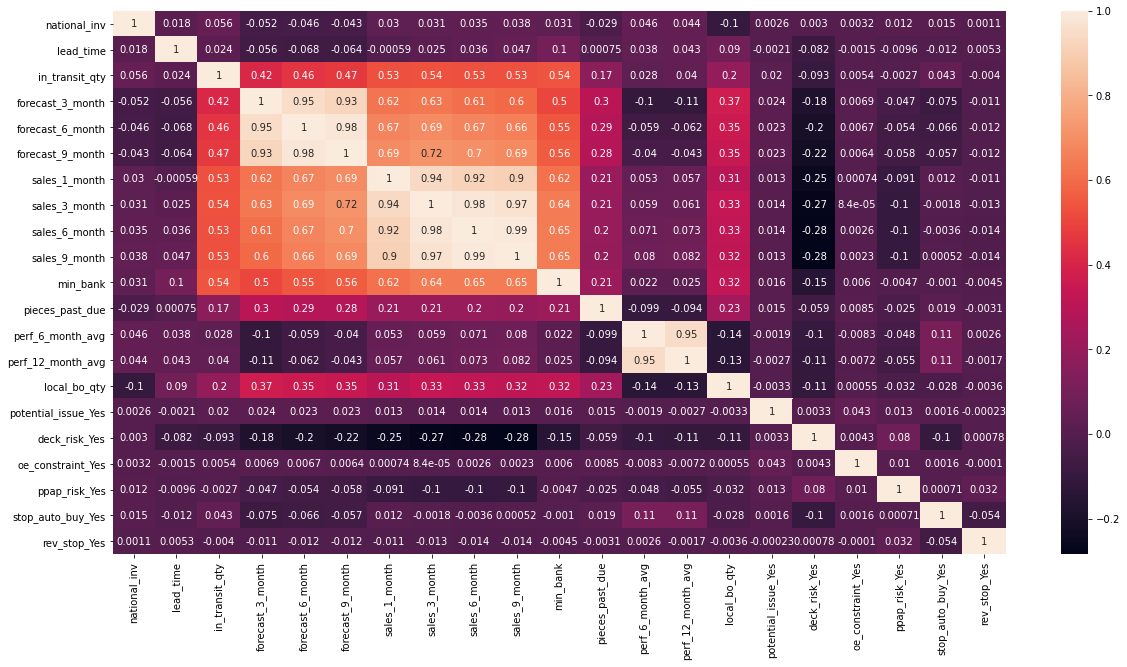

In [75]:
plt.figure(figsize=(20,10))
sns.heatmap(xtrain_pt.corr(),annot=True)
plt.show()

We see that the main multicollinearity is observed with in **sales columns, forecast columns and performance columns** all within themselves.

We will try 2 approaches,

    Apply individual PCA on the sales, forecast and performances groups seperately and make indices out of these columns. 
    This will inturn retain the originality of the other features and give explainability.

    Apply PCA for the whole dataset and retain only the principle components.

### Approach 1

we have 3 main groups with high multicollinearity

    Sales columns.
    Forecast columns.
    Performance coluumns.
We will extract each of these groups seperately and apply pca on them and finally concat the decided priciple components we choose.

#### Sales groups

In [76]:
pca_xtrain = xtrain_pt.copy()
pca_xtest  = xtest_pt.copy()

In [77]:
xtr_sales = xtrain_pt[['sales_1_month','sales_3_month','sales_6_month','sales_9_month']]
xts_sales = xtest_pt[['sales_1_month','sales_3_month','sales_6_month','sales_9_month']]

pca_xtrain.drop(columns=['sales_1_month','sales_3_month','sales_6_month','sales_9_month'],inplace=True)
pca_xtest.drop(columns=['sales_1_month','sales_3_month','sales_6_month','sales_9_month'],inplace=True)

In [78]:
from sklearn.decomposition import PCA

In [79]:
pca = PCA()

In [80]:
pca.fit(xtr_sales)

PCA()

In [81]:
pd.DataFrame({'PCA':['PCA_'+str(i) for i in range(1,len(xtr_sales.columns)+1)],'Explained %':pca.explained_variance_ratio_})

,PCA,Explained %
0,PCA_1,0.963009
1,PCA_2,0.028858
2,PCA_3,0.006332
3,PCA_4,0.001801


we see that the 1st pca itself explains 96% of the variace. Hence we will take only 1 pca from this

In [82]:
pca = PCA(n_components=1)
xtr_sales_pca = pca.fit_transform(xtr_sales)
pca_xtrain['Sales_index'] = xtr_sales_pca


xts_sales_pca = pca.transform(xts_sales)
pca_xtest['Sales_index']= xts_sales_pca

**Forecast groups**

In [83]:
xtr_forecast = xtrain_pt[['forecast_3_month','forecast_6_month','forecast_9_month']]
xts_forecast = xtest_pt[['forecast_3_month','forecast_6_month','forecast_9_month']]

pca_xtrain.drop(columns=['forecast_3_month','forecast_6_month','forecast_9_month'],inplace=True)
pca_xtest.drop(columns=['forecast_3_month','forecast_6_month','forecast_9_month'],inplace=True)

In [84]:
pca = PCA()
pca.fit(xtr_forecast)

PCA()

In [85]:
pd.DataFrame({'PCA':['PCA_'+str(i) for i in range(1,len(xtr_forecast.columns)+1)],'Explained %':pca.explained_variance_ratio_})

,PCA,Explained %
0,PCA_1,0.969346
1,PCA_2,0.025398
2,PCA_3,0.005256


Same as above, only one pca is explaining 96% of variance.

In [86]:
pca = PCA(n_components=1)
xtr_forecast_pca = pca.fit_transform(xtr_forecast)
pca_xtrain['forecast_index'] = xtr_forecast_pca


xts_forecast_pca = pca.transform(xts_forecast)
pca_xtest['forecast_index']= xts_forecast_pca

**Performance group**

In [87]:
xtr_performance = xtrain_pt[['perf_12_month_avg','perf_6_month_avg']]
xts_performance = xtest_pt[['perf_12_month_avg','perf_6_month_avg']]

pca_xtrain.drop(columns=['perf_12_month_avg','perf_6_month_avg'],inplace=True)
pca_xtest.drop(columns=['perf_12_month_avg','perf_6_month_avg'],inplace=True)

In [88]:
pca = PCA()
pca.fit(xtr_performance)

PCA()

In [89]:
pd.DataFrame({'PCA':['PCA_'+str(i) for i in range(1,len(xts_performance.columns)+1)],'Explained %':pca.explained_variance_ratio_})

,PCA,Explained %
0,PCA_1,0.973149
1,PCA_2,0.026851


Same as above, only one pca is explaining 97% of variance.

In [90]:
pca = PCA(n_components=1)
xtr_performance_pca = pca.fit_transform(xtr_performance)
pca_xtrain['performance_index'] = xtr_performance_pca


xts_performance_pca = pca.transform(xts_performance)
pca_xtest['performance_index']= xts_performance_pca

In [91]:
pca_xtrain.head()

,national_inv,lead_time,in_transit_qty,min_bank,pieces_past_due,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes,Sales_index,forecast_index,performance_index
0,0.230335,-0.558101,-0.478951,1.730453,-0.257536,-0.305683,0,1,0,0,1,0,2.995662,2.678885,-1.395182
1,-0.036267,1.145719,-0.478951,-0.899422,-0.257536,-0.305683,0,0,0,0,1,0,-2.482683,-1.956639,0.335137
2,0.032222,0.469599,-0.478951,1.456751,-0.257536,-0.305683,0,0,0,0,1,0,1.801544,1.793179,-1.783813
3,-0.032752,0.469599,-0.478951,0.105512,-0.257536,-0.305683,0,1,0,0,1,0,-1.514782,-1.956639,-0.339984
4,-0.044092,0.469599,-0.478951,-0.899422,-0.257536,-0.305683,0,1,0,0,1,0,-0.791987,-1.956639,-1.899308


In [92]:
pca_xtest.head()

,national_inv,lead_time,in_transit_qty,min_bank,pieces_past_due,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes,Sales_index,forecast_index,performance_index
1577177,-0.050721,-1.400905,-0.478951,-0.899422,-0.257536,-0.305683,0,0,0,0,1,0,-2.482683,-1.956639,0.814601
927028,-0.047131,1.145719,-0.478951,-0.899422,-0.257536,-0.305683,0,0,0,0,1,0,-2.482683,-1.956639,0.111239
1564530,0.038922,-1.400905,2.257672,1.702264,3.973409,-0.305683,0,0,0,0,1,0,3.104559,2.486276,1.326952
1625262,0.012713,0.469599,-0.478951,-0.899422,-0.257536,-0.305683,0,0,0,0,1,0,-2.482683,-1.956639,-1.843150
1048104,-0.044092,0.660646,-0.478951,-0.899422,-0.257536,-0.305683,0,0,0,1,1,0,-2.482683,-1.956639,-1.839971


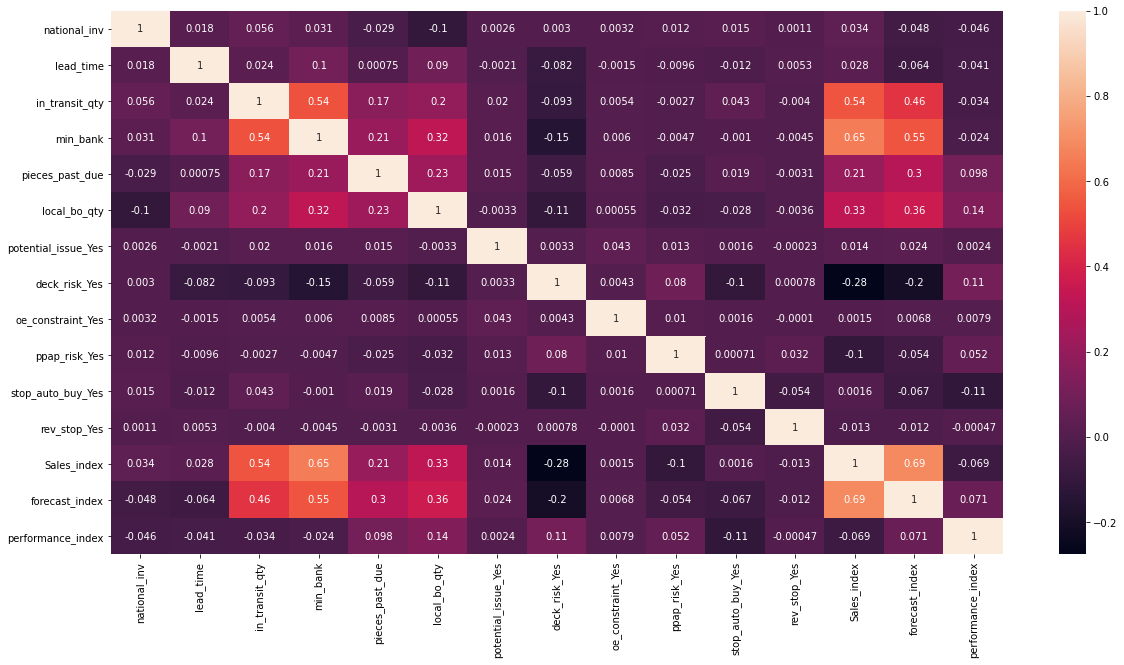

In [93]:
plt.figure(figsize=(20,10))
sns.heatmap(pca_xtrain.corr(),annot=True)
plt.show()

##### we have removed the high level of correlation between the independent variables. But even now some level of positive correaltion exists between some of the independent features.

## Modelling with PCA - Approach 1

### Logistic Regression -  PCA - Approach 1

In [94]:
lr_a1 = LogisticRegression(solver='liblinear',max_iter=5000)
lr_a1.fit(pca_xtrain,ytrain_smote)

ytrain_pred_a1 = lr_a1.predict(pca_xtrain)
ytrain_prob_a1 = lr_a1.predict_proba(pca_xtrain)[:,1]

ytest_pred_a1 = lr_a1.predict(pca_xtest)
ytest_prob_a1 = lr_a1.predict_proba(pca_xtest)[:,1]


accuracy score of the train data is:  0.8390633842671195
accuracy score of the test data is:  0.8380487257213428

F1 score of the train data is:  0.8392953010652425
F1 score of the test data is:  0.06361570918532944

roc_auc_score of the train data is:  0.9098177319788463
roc_auc_score of the test data is:  0.8395585105161834

recall_score of the test data is:  0.7101449275362319
precision_score of the test data is:  0.03329935440027183

cohen_kappa_score  of the train data is:  0.6781267685342388
cohen_kappa_score  of the test data is:  0.04954954505109832

Classification report train
              precision    recall  f1-score   support

           0       0.84      0.84      0.84     70680
           1       0.84      0.84      0.84     70680

    accuracy                           0.84    141360
   macro avg       0.84      0.84      0.84    141360
weighted avg       0.84      0.84      0.84    141360



Classification report test
              precision    recall  f1-score   suppo

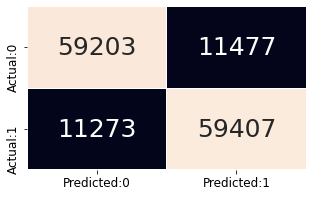


Confusion matrix test data


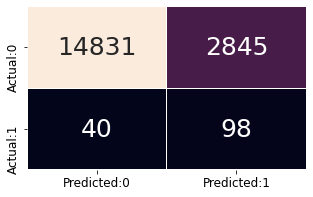

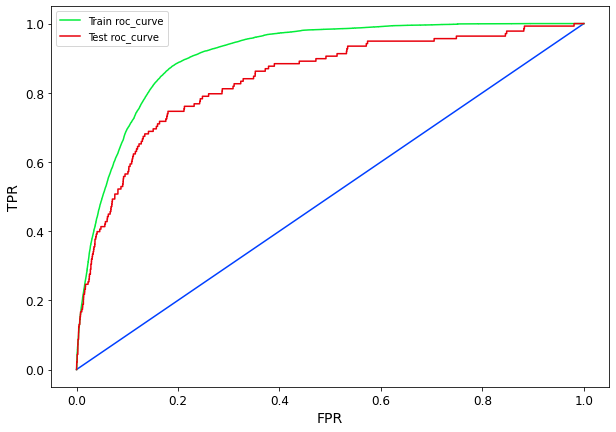

In [95]:
log_train_f1_a1, log_test_f1_a1, log_train_roc_a1, log_test_roc_a1 , recall_tr,precison_tr,cohen_kappa_score_tr,cohen_kappa_score_ts  = model_eval(pca_xtrain, pca_xtest,
                                                                              ytrain_smote,ytest,
                                                                              ytrain_pred_a1, ytest_pred_a1,
                                                                              ytrain_prob_a1, ytest_prob_a1)

In [96]:
models.append('Approach 1 PCA - Logistic regression') 
f1_train_scores.append(log_train_f1_a1)
f1_test_scores.append(log_test_f1_a1)
roc_train_scores.append(log_train_roc_a1)
roc_test_scores.append(log_test_roc_a1)
recall_test.append(recall_tr)
precision_test.append(precison_tr)
kapppa_train_score.append(cohen_kappa_score_tr)
kapppa_test_score.append(cohen_kappa_score_ts) 

In [97]:
summary= pd.DataFrame({'Models':models,
                       'Train f1 score':f1_train_scores,
                       'Test f1 scores':f1_test_scores,
                       'Train ROC':roc_train_scores,
                       'Test ROC':roc_test_scores,
                       'Test recall':recall_test,
                       'Test precision':precision_test,
                      'kapppa_train_score':kapppa_train_score,
                       'kapppa_test_score':kapppa_test_score})
summary

,Models,Train f1 score,Test f1 scores,Train ROC,Test ROC,Test recall,Test precision,kapppa_train_score,kapppa_test_score
0,Base model - Logistic regression,0.010152,0.000000,0.726344,0.664434,0.000000,0.000000,0.009693,-0.000542
1,Base model - RandomForest,0.986784,0.040000,0.999988,0.888479,0.021739,0.250000,0.986678,0.038809
2,SMOTE Data - Logistic Regression,0.811905,0.031192,0.873330,0.773835,0.666667,0.015969,0.581636,0.016307
3,SMOTE Data - RandomForest,0.392536,0.040000,0.983348,0.888479,0.021739,0.250000,0.244185,0.038809
4,PowerTransformed Data - Logistic Regression,0.842373,0.069396,0.913154,0.842870,0.724638,0.036443,0.686503,0.055463
5,PowerTransformed Data - RandomForest,0.999901,0.188235,0.999999,0.896752,0.173913,0.205128,0.999802,0.182423
6,Approach 1 PCA - Logistic regression,0.839295,0.063616,0.909818,0.839559,0.710145,0.033299,0.678127,0.049550


 *Here we can see that of all the Logistic regressions, we have the best performance for logistic regression without for the prower transformed data without the PCA done.*

*The logistic regression with approach 1 pca data has the highest f1 scre for test data set.*

### RandomForest - PCA - Approach 1

In [98]:
rf_a1= RandomForestClassifier(random_state=3)
rf_a1.fit(pca_xtrain,ytrain_smote)

ytrain_pred_rf_a1 = rf_a1.predict(pca_xtrain)
ytrain_prob_rf_a1 = rf_a1.predict_proba(pca_xtrain)[:,1]

ytest_pred_rf_a1 = rf_a1.predict(pca_xtest)
ytest_prob_rf_a1 = rf_a1.predict_proba(pca_xtest)[:,1]


accuracy score of the train data is:  0.9999009620826259
accuracy score of the test data is:  0.9863590434489727

F1 score of the train data is:  0.9999009550760524
F1 score of the test data is:  0.20846905537459284

roc_auc_score of the train data is:  0.999998385099041
roc_auc_score of the test data is:  0.8892197231323239

recall_score of the test data is:  0.2318840579710145
precision_score of the test data is:  0.1893491124260355

cohen_kappa_score  of the train data is:  0.9998019241652518
cohen_kappa_score  of the test data is:  0.20166004764808132

Classification report train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70680
           1       1.00      1.00      1.00     70680

    accuracy                           1.00    141360
   macro avg       1.00      1.00      1.00    141360
weighted avg       1.00      1.00      1.00    141360



Classification report test
              precision    recall  f1-score   support

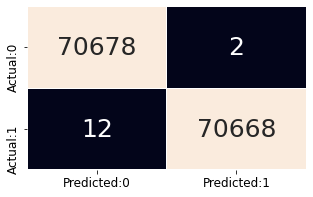


Confusion matrix test data


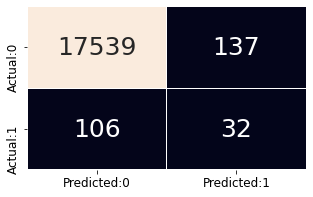

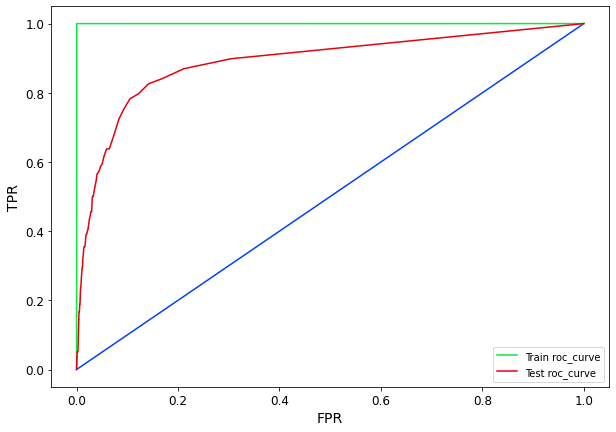

In [99]:
rf_train_f1_a1, rf_test_f1_a1, rf_train_roc_a1, rf_test_roc_a1 , recall_tr,precison_tr,cohen_kappa_score_tr,cohen_kappa_score_ts = model_eval(pca_xtrain, pca_xtest,
                                                                              ytrain_smote,ytest,
                                                                              ytrain_pred_rf_a1, ytest_pred_rf_a1,
                                                                              ytrain_prob_rf_a1, ytest_prob_rf_a1)

In [100]:
models.append('Approach 1 PCA - RandomForest') 
f1_train_scores.append(rf_train_f1_a1)
f1_test_scores.append(rf_test_f1_a1)
roc_train_scores.append(rf_train_roc_a1)
roc_test_scores.append(rf_test_roc_a1)
recall_test.append(recall_tr)
precision_test.append(precison_tr)
kapppa_train_score.append(cohen_kappa_score_tr)
kapppa_test_score.append(cohen_kappa_score_ts)

In [101]:
summary= pd.DataFrame({'Models':models,
                       'Train f1 score':f1_train_scores,
                       'Test f1 scores':f1_test_scores,
                       'Train ROC':roc_train_scores,
                       'Test ROC':roc_test_scores,
                       'Test recall':recall_test,
                       'Test precision':precision_test,
                      'kapppa_train_score':kapppa_train_score,
                       'kapppa_test_score':kapppa_test_score})
summary

,Models,Train f1 score,Test f1 scores,Train ROC,Test ROC,Test recall,Test precision,kapppa_train_score,kapppa_test_score
0,Base model - Logistic regression,0.010152,0.000000,0.726344,0.664434,0.000000,0.000000,0.009693,-0.000542
1,Base model - RandomForest,0.986784,0.040000,0.999988,0.888479,0.021739,0.250000,0.986678,0.038809
2,SMOTE Data - Logistic Regression,0.811905,0.031192,0.873330,0.773835,0.666667,0.015969,0.581636,0.016307
3,SMOTE Data - RandomForest,0.392536,0.040000,0.983348,0.888479,0.021739,0.250000,0.244185,0.038809
4,PowerTransformed Data - Logistic Regression,0.842373,0.069396,0.913154,0.842870,0.724638,0.036443,0.686503,0.055463
5,PowerTransformed Data - RandomForest,0.999901,0.188235,0.999999,0.896752,0.173913,0.205128,0.999802,0.182423
6,Approach 1 PCA - Logistic regression,0.839295,0.063616,0.909818,0.839559,0.710145,0.033299,0.678127,0.049550
7,Approach 1 PCA - RandomForest,0.999901,0.208469,0.999998,0.889220,0.231884,0.189349,0.999802,0.201660


##### We can see that Random forest has a very good performance for the 1st approach PCA method. It has the highest f1 and roc score both train and test data.

## Modelling with PCA - Approach 2

In [102]:
xtrain_pca = xtrain_pt.copy()
xtest_pca  = xtest_pt.copy()

In [103]:
pca = PCA()
pca.fit(xtrain_pca)

PCA()

In [104]:
pd.DataFrame({'PCA':['PCA_'+str(i) for i in range(1,len(xtrain_pca.columns)+1)],'Explained %':pca.explained_variance_ratio_,'Cumulative % explained':np.cumsum(pca.explained_variance_ratio_)*100})

,PCA,Explained %,Cumulative % explained
0,PCA_1,0.448584,44.858410
1,PCA_2,0.138462,58.704619
2,PCA_3,0.076929,66.397538
3,PCA_4,0.071171,73.514621
4,PCA_5,0.061598,79.674396
5,PCA_6,0.052475,84.921851
6,PCA_7,0.046838,89.605686
7,PCA_8,0.044562,94.061910
8,PCA_9,0.027591,96.821042
9,PCA_10,0.007723,97.593320


##### We see that 11 pca together explain 98% of variance. So we will take 11 components.

In [105]:
pca = PCA(n_components=11)
xtrain_pca_a2 = pca.fit_transform(xtrain_pca)
xtrain_pca_a2 = pd.DataFrame(xtrain_pca_a2,columns=['PCA'+str(i) for i in range(1,12)],index= xtrain_pca.index)

xtest_pca_a2  = pca.transform(xtest_pca)
xtest_pca_a2 = pd.DataFrame(xtest_pca_a2,columns=['PCA'+str(i) for i in range(1,12)],index= xtest_pca.index)

In [106]:
xtrain_pca_a2.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,3.894882,1.411290,-0.738270,0.883344,-0.265438,-0.650721,0.266887,-0.732447,-1.369173,-0.640261,0.856599
1,-3.302069,-0.286000,0.650677,-0.895893,0.192874,-0.375576,-0.312012,0.069883,0.263080,-0.113079,-0.308785
2,2.512452,1.796410,-0.416603,-0.162499,-0.088515,-0.937871,-0.026481,-0.591704,-1.202667,0.139771,0.079629
3,-2.377463,0.503851,0.622820,-0.531986,-0.024271,0.280066,-0.129403,0.262782,-0.587078,0.116997,0.903865
4,-2.148283,2.032416,0.168501,-0.590638,-0.081153,0.359092,0.211741,-0.289421,0.366409,0.288352,1.105542


### Logistic Regression - PCA - Approach 2

In [107]:
lr_a2 = LogisticRegression(solver='liblinear',max_iter=5000)
lr_a2.fit(xtrain_pca_a2,ytrain_smote)

ytrain_pred_a2 = lr_a2.predict(xtrain_pca_a2)
ytrain_prob_a2 = lr_a2.predict_proba(xtrain_pca_a2)[:,1]

ytest_pred_a2 = lr_a2.predict(xtest_pca_a2)
ytest_prob_a2 = lr_a2.predict_proba(xtest_pca_a2)[:,1]

accuracy score of the train data is:  0.8368491794001132
accuracy score of the test data is:  0.8385539463343438

F1 score of the train data is:  0.8367487064053287
F1 score of the test data is:  0.06623376623376624

roc_auc_score of the train data is:  0.908219153480027
roc_auc_score of the test data is:  0.848436920937585

recall_score of the test data is:  0.7391304347826086
precision_score of the test data is:  0.03467029231815092

cohen_kappa_score  of the train data is:  0.6736983588002263
cohen_kappa_score  of the test data is:  0.05220714674840843

Classification report train
              precision    recall  f1-score   support

           0       0.84      0.84      0.84     70680
           1       0.84      0.84      0.84     70680

    accuracy                           0.84    141360
   macro avg       0.84      0.84      0.84    141360
weighted avg       0.84      0.84      0.84    141360



Classification report test
              precision    recall  f1-score   support

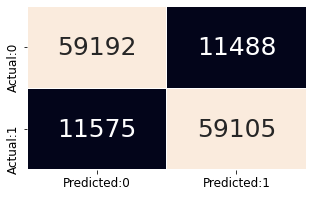


Confusion matrix test data


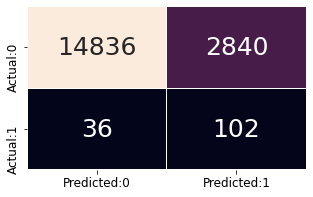

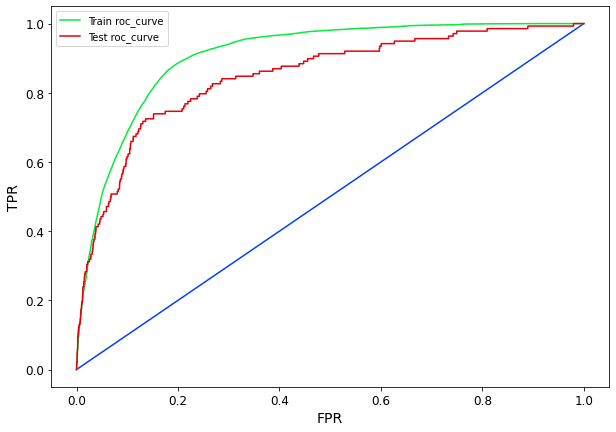

In [108]:
log_train_f1_a2, log_test_f1_a2, log_train_roc_a2, log_test_roc_a2 , recall_tr,precison_tr,cohen_kappa_score_tr,cohen_kappa_score_ts  = model_eval(xtrain_pca_a2, xtest_pca_a2,
                                                                              ytrain_smote,ytest,
                                                                              ytrain_pred_a2, ytest_pred_a2,
                                                                              ytrain_prob_a2, ytest_prob_a2)

In [109]:
models.append('Approach 2 PCA - Linear Regression')
f1_train_scores.append(log_train_f1_a2)
f1_test_scores.append(log_test_f1_a2)
roc_train_scores.append(log_train_roc_a2)
roc_test_scores.append(log_test_roc_a2)
recall_test.append(recall_tr)
precision_test.append(precison_tr)
kapppa_train_score.append(cohen_kappa_score_tr)
kapppa_test_score.append(cohen_kappa_score_ts) 

In [110]:
summary= pd.DataFrame({'Models':models,
                       'Train f1 score':f1_train_scores,
                       'Test f1 scores':f1_test_scores,
                       'Train ROC':roc_train_scores,
                       'Test ROC':roc_test_scores,
                       'Test recall':recall_test,
                       'Test precision':precision_test,
                      'kapppa_train_score':kapppa_train_score,
                       'kapppa_test_score':kapppa_test_score})
summary

,Models,Train f1 score,Test f1 scores,Train ROC,Test ROC,Test recall,Test precision,kapppa_train_score,kapppa_test_score
0,Base model - Logistic regression,0.010152,0.000000,0.726344,0.664434,0.000000,0.000000,0.009693,-0.000542
1,Base model - RandomForest,0.986784,0.040000,0.999988,0.888479,0.021739,0.250000,0.986678,0.038809
2,SMOTE Data - Logistic Regression,0.811905,0.031192,0.873330,0.773835,0.666667,0.015969,0.581636,0.016307
3,SMOTE Data - RandomForest,0.392536,0.040000,0.983348,0.888479,0.021739,0.250000,0.244185,0.038809
4,PowerTransformed Data - Logistic Regression,0.842373,0.069396,0.913154,0.842870,0.724638,0.036443,0.686503,0.055463
5,PowerTransformed Data - RandomForest,0.999901,0.188235,0.999999,0.896752,0.173913,0.205128,0.999802,0.182423
6,Approach 1 PCA - Logistic regression,0.839295,0.063616,0.909818,0.839559,0.710145,0.033299,0.678127,0.049550
7,Approach 1 PCA - RandomForest,0.999901,0.208469,0.999998,0.889220,0.231884,0.189349,0.999802,0.201660
8,Approach 2 PCA - Linear Regression,0.836749,0.066234,0.908219,0.848437,0.739130,0.034670,0.673698,0.052207


### RandomForest - PCA - Approach 2

In [111]:
rf_a2= RandomForestClassifier(random_state=3)
rf_a2.fit(xtrain_pca_a2,ytrain_smote)

ytrain_pred_rf_a2 = rf_a2.predict(xtrain_pca_a2)
ytrain_prob_rf_a2 = rf_a2.predict_proba(xtrain_pca_a2)[:,1]

ytest_pred_rf_a2 = rf_a2.predict(xtest_pca_a2)
ytest_prob_rf_a2 = rf_a2.predict_proba(xtest_pca_a2)[:,1]

accuracy score of the train data is:  0.9999009620826259
accuracy score of the test data is:  0.9658695408105984

F1 score of the train data is:  0.9999009578788006
F1 score of the test data is:  0.10059171597633135

roc_auc_score of the train data is:  0.9999953726857125
roc_auc_score of the test data is:  0.8428190931124165

recall_score of the test data is:  0.2463768115942029
precision_score of the test data is:  0.06319702602230483

cohen_kappa_score  of the train data is:  0.9998019241652518
cohen_kappa_score  of the test data is:  0.08936304164463849

Classification report train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70680
           1       1.00      1.00      1.00     70680

    accuracy                           1.00    141360
   macro avg       1.00      1.00      1.00    141360
weighted avg       1.00      1.00      1.00    141360



Classification report test
              precision    recall  f1-score   suppo

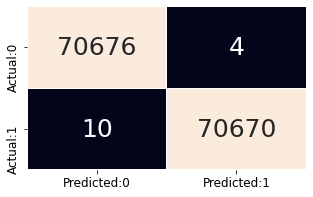


Confusion matrix test data


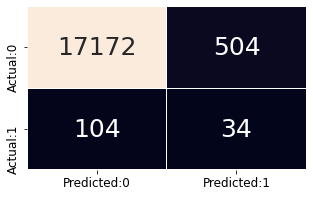

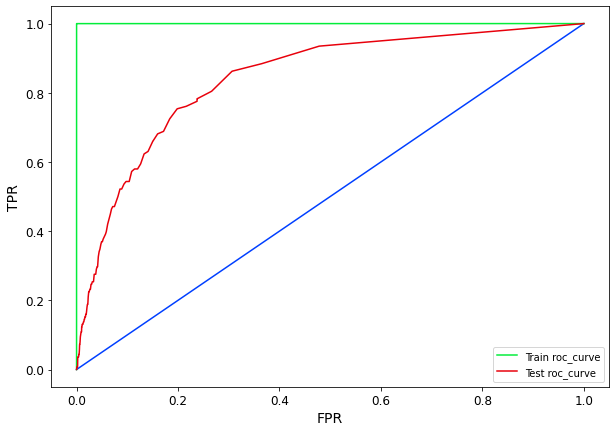

In [112]:
rf_train_f1_a2, rf_test_f1_a2, rf_train_roc_a2, rf_test_roc_a2 , recall_tr,precison_tr,cohen_kappa_score_tr,cohen_kappa_score_ts = model_eval(xtrain_pca_a2, xtest_pca_a2,
                                                                              ytrain_smote,ytest,
                                                                              ytrain_pred_rf_a2, ytest_pred_rf_a2,
                                                                              ytrain_prob_rf_a2, ytest_prob_rf_a2)

In [113]:
models.append('Approach 2 PCA - RandomForest')
f1_train_scores.append(rf_train_f1_a2)
f1_test_scores.append(rf_test_f1_a2)
roc_train_scores.append(rf_train_roc_a2)
roc_test_scores.append(rf_test_roc_a2)
recall_test.append(recall_tr)
precision_test.append(precison_tr)
kapppa_train_score.append(cohen_kappa_score_tr)
kapppa_test_score.append(cohen_kappa_score_ts)

In [114]:
summary= pd.DataFrame({'Models':models,
                       'Train f1 score':f1_train_scores,
                       'Test f1 scores':f1_test_scores,
                       'Train ROC':roc_train_scores,
                       'Test ROC':roc_test_scores,
                       'Test recall':recall_test,
                       'Test precision':precision_test,
                      'kapppa_train_score':kapppa_train_score,
                       'kapppa_test_score':kapppa_test_score})
summary

,Models,Train f1 score,Test f1 scores,Train ROC,Test ROC,Test recall,Test precision,kapppa_train_score,kapppa_test_score
0,Base model - Logistic regression,0.010152,0.000000,0.726344,0.664434,0.000000,0.000000,0.009693,-0.000542
1,Base model - RandomForest,0.986784,0.040000,0.999988,0.888479,0.021739,0.250000,0.986678,0.038809
2,SMOTE Data - Logistic Regression,0.811905,0.031192,0.873330,0.773835,0.666667,0.015969,0.581636,0.016307
3,SMOTE Data - RandomForest,0.392536,0.040000,0.983348,0.888479,0.021739,0.250000,0.244185,0.038809
4,PowerTransformed Data - Logistic Regression,0.842373,0.069396,0.913154,0.842870,0.724638,0.036443,0.686503,0.055463
5,PowerTransformed Data - RandomForest,0.999901,0.188235,0.999999,0.896752,0.173913,0.205128,0.999802,0.182423
6,Approach 1 PCA - Logistic regression,0.839295,0.063616,0.909818,0.839559,0.710145,0.033299,0.678127,0.049550
7,Approach 1 PCA - RandomForest,0.999901,0.208469,0.999998,0.889220,0.231884,0.189349,0.999802,0.201660
8,Approach 2 PCA - Linear Regression,0.836749,0.066234,0.908219,0.848437,0.739130,0.034670,0.673698,0.052207
9,Approach 2 PCA - RandomForest,0.999901,0.100592,0.999995,0.842819,0.246377,0.063197,0.999802,0.089363


### Proceeding with PCA 1 Approach

In [115]:
pca_xtrain.shape,pca_xtest.shape

((141360, 15), (17814, 15))

In [116]:
from sklearn.feature_selection import SelectKBest, f_classif

kbest= SelectKBest(f_classif, k= len(pca_xtrain.columns))
kbest.fit(pca_xtrain,ytrain_smote)

kbest.pvalues_

array([7.07240513e-253, 0.00000000e+000, 2.60963123e-263, 9.34146137e-011,
       0.00000000e+000, 0.00000000e+000, 1.46017555e-012, 0.00000000e+000,
       1.14089225e-002, 0.00000000e+000, 7.36888298e-130, 7.72847157e-006,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000])

In [117]:
pd.DataFrame({'Features':pca_xtrain.columns,'scores':np.round(kbest.scores_,3),'pvalues':np.round(kbest.pvalues_,3)}).sort_values(by = 'pvalues')

,Features,scores,pvalues
0,national_inv,1158.416,0.000
1,lead_time,3004.049,0.000
2,in_transit_qty,1206.823,0.000
3,min_bank,41.961,0.000
4,pieces_past_due,5589.201,0.000
5,local_bo_qty,9841.985,0.000
6,potential_issue_Yes,50.110,0.000
7,deck_risk_Yes,5894.334,0.000
9,ppap_risk_Yes,2870.422,0.000
10,stop_auto_buy_Yes,589.072,0.000


##### We see that all features are important, as the pvalue is less than 0.05 for all the features.

In [118]:
Final_train = pd.concat([pca_xtrain,ytrain_smote],axis=1)
Final_test = pd.concat([pca_xtest,ytest],axis=1)

In [119]:
Final_train.to_csv('Final_train.csv')
Final_test.to_csv('Final_test.csv')